<a href="https://colab.research.google.com/github/atif4/Q2/blob/gh-pages/exams_binary_class_KFold_validation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
"""from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

"""
# ask question about the difference 
from keras import models
from keras import layers

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [6]:
def get_percentage(total_number, col_id, conditional_name):
  length = len(df[df[col_id]== conditional_name])
  percentage = (length/total_number)*100
  result = f"The percentage of {conditional_name} is {percentage}"
  return result
get_percentage(1000, 'gender', 'male')

'The percentage of male is 51.7'

In [7]:
get_percentage(1000, 'gender', 'female')

'The percentage of female is 48.3'

In [8]:
51.7+48.3

100.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


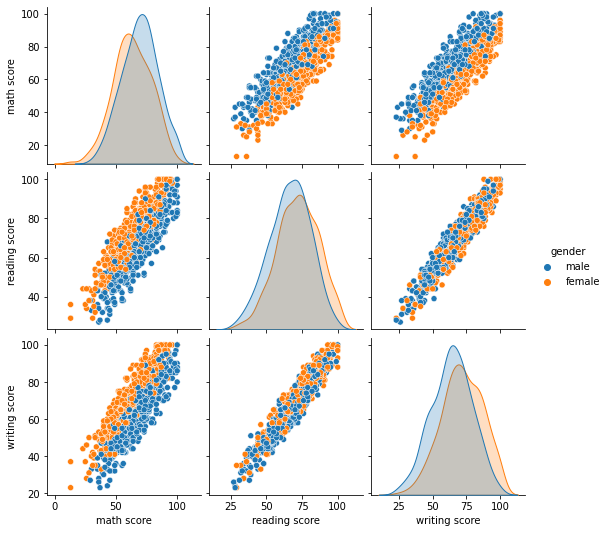

In [12]:
def get_pair_plot(df_id,hue_id):
    sns.pairplot(data= df_id,hue=hue_id)
    plt.show()
get_pair_plot(df, 'gender')

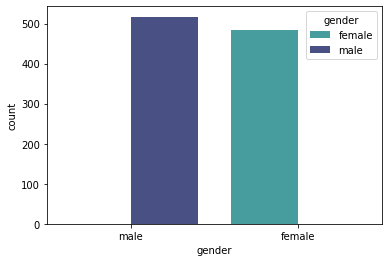

In [13]:
def get_countplot(col_id, df_id,hu= "gender",pal="mako_r",figsize=(6,4)):
    #the parameter in which values are can be change at any time
    plt.figure(figsize=figsize)
    sns.countplot(x=col_id, data=df_id,hue=df_id[hu].sort_values(),palette=pal)
    plt.show()
get_countplot("gender",df)

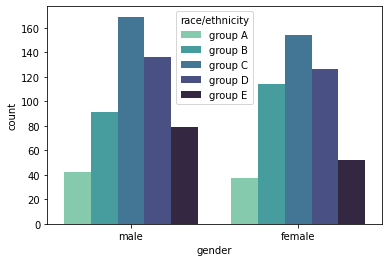

In [14]:
get_countplot('gender',df,'race/ethnicity')

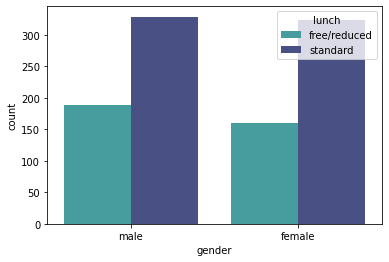

In [15]:
get_countplot('gender',df,'lunch')

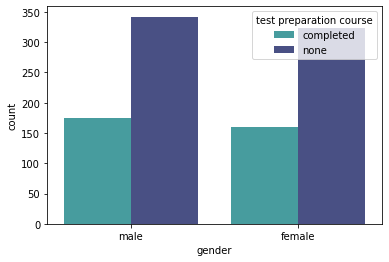

In [16]:
get_countplot('gender',df,'test preparation course')

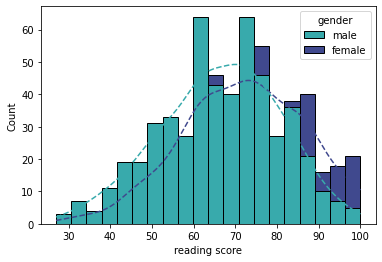

In [17]:
def get_hist_plot(df_id, c_id, hue='gender', kde=True, line_kws = {'color':'red','linestyle': 'dashed'},pal="mako_r",alpha=1.0):
    sns.histplot(data=df_id, x=c_id, hue=hue, kde=True, line_kws=line_kws,palette=pal,alpha=alpha,)
    plt.show()
get_hist_plot(df,'reading score')

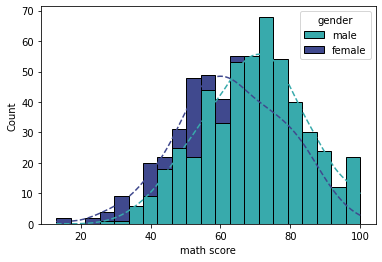

In [18]:
get_hist_plot(df,'math score')

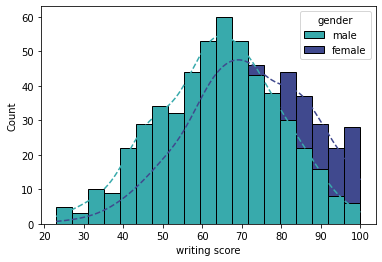

In [19]:
get_hist_plot(df,'writing score')

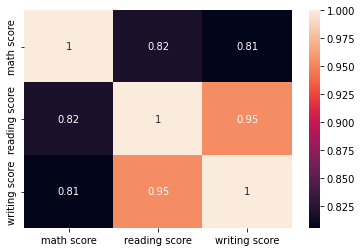

In [20]:
def get_heatmap(df_id):
    sns.heatmap(df_id.corr(),annot=True)
get_heatmap(df)

In [21]:
df['race/ethnicity'].value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

In [22]:
df['lunch'].value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [23]:
df['parental level of education'].value_counts()

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental level of education, dtype: int64

In [24]:
df['test preparation course'].value_counts()

none         665
completed    335
Name: test preparation course, dtype: int64

In [25]:
def get_labed_encoder(col_ids_list):
    for col_id_list in col_ids_list:
        df[col_id_list] = df[col_id_list].apply(LabelEncoder().fit_transform)
get_labed_encoder([["gender","race/ethnicity","parental level of education","lunch","test preparation course"]])

In [26]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,73,70,65
996,1,3,0,0,0,85,91,92
997,0,2,5,0,1,32,35,41
998,0,2,4,1,1,73,74,82


In [27]:
#df.drop(['lunch','race/ethnicity','parental level of education','test preparation course'], axis=1,inplace=True)

In [28]:
#df

In [29]:
#Separate Feature and Target Matrix
def get_seprate_features(df_id,col_id):
    #col_id is special col or target col b/c this the whole model is going to be created 
    global X, y
    X = df_id.drop(col_id,axis = 1) 
    y = df_id[col_id]
get_seprate_features(df,'gender')

In [30]:
X

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,1,0,67,67,63
1,3,5,0,1,40,59,55
2,4,4,0,1,59,60,50
3,1,2,1,1,77,78,68
4,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...
995,2,2,1,1,73,70,65
996,3,0,0,0,85,91,92
997,2,5,0,1,32,35,41
998,2,4,1,1,73,74,82


In [31]:
y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    0
998    0
999    1
Name: gender, Length: 1000, dtype: int64

In [32]:
"""y = df['gender']
y = pd.get_dummies(y)
y.head()"""

"y = df['gender']\ny = pd.get_dummies(y)\ny.head()"

In [33]:
y.drop_duplicates()

0    1
1    0
Name: gender, dtype: int64

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

array([[0.        , 0.4       , 1.        , ..., 0.62068966, 0.54794521,
        0.51948052],
       [0.75      , 1.        , 0.        , ..., 0.31034483, 0.43835616,
        0.41558442],
       [1.        , 0.8       , 0.        , ..., 0.52873563, 0.45205479,
        0.35064935],
       ...,
       [0.5       , 1.        , 0.        , ..., 0.2183908 , 0.10958904,
        0.23376623],
       [0.5       , 0.8       , 1.        , ..., 0.68965517, 0.64383562,
        0.76623377],
       [0.        , 0.8       , 1.        , ..., 0.59770115, 0.45205479,
        0.50649351]])

In [35]:
def get_train_test_split(array1, array2, test_size, random_state):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(array1, array2, test_size=test_size,random_state=random_state)
get_train_test_split(X,y,0.3,0)

In [36]:
print(f"Shape of X train: {X_train.shape}\nShape of y train: {y_train.shape}\nShape of X test: {X_test.shape}\nShape of y test: {y_test.shape}")

Shape of X train: (700, 7)
Shape of y train: (700,)
Shape of X test: (300, 7)
Shape of y test: (300,)


In [37]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  #model.add(Dense(2, activation='softmax')) # model.add(Dense(1 --> columns in Y, activation='sigmoid' ---> binary classification))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [38]:
k=4
num_val_samples = len(X_train) // k
num_epochs = 100
all_acc_histories = []
for i in range(k):
    print('processing fold #', i)
    # i = 1
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
    model = build_model() # build_model() is function 
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
    acc_history = history.history['val_accuracy']
    all_acc_histories.append(acc_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [39]:
all_acc_histories

[[0.508571445941925,
  0.6800000071525574,
  0.5257142782211304,
  0.7599999904632568,
  0.8171428442001343,
  0.8285714387893677,
  0.7142857313156128,
  0.7657142877578735,
  0.8799999952316284,
  0.7942857146263123,
  0.868571400642395,
  0.8057143092155457,
  0.6857143044471741,
  0.845714271068573,
  0.7599999904632568,
  0.7599999904632568,
  0.8399999737739563,
  0.822857141494751,
  0.8799999952316284,
  0.8514285683631897,
  0.868571400642395,
  0.7828571200370789,
  0.8571428656578064,
  0.868571400642395,
  0.868571400642395,
  0.8628571629524231,
  0.8571428656578064,
  0.7542856931686401,
  0.7714285850524902,
  0.845714271068573,
  0.8571428656578064,
  0.8514285683631897,
  0.8857142925262451,
  0.8799999952316284,
  0.8114285469055176,
  0.8571428656578064,
  0.7828571200370789,
  0.845714271068573,
  0.8628571629524231,
  0.8342857360839844,
  0.8799999952316284,
  0.8342857360839844,
  0.8285714387893677,
  0.8342857360839844,
  0.8628571629524231,
  0.817142844200134

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
print(len(average_acc_history))
average_acc_history 

100


[0.5642857179045677,
 0.7171428501605988,
 0.6899999976158142,
 0.7757142782211304,
 0.8214285671710968,
 0.7814285755157471,
 0.8014285862445831,
 0.812857136130333,
 0.8128571510314941,
 0.8042857199907303,
 0.8471428453922272,
 0.8100000023841858,
 0.8028571456670761,
 0.8457142859697342,
 0.8285714238882065,
 0.8085714280605316,
 0.8214285671710968,
 0.854285717010498,
 0.8614285588264465,
 0.8485714197158813,
 0.8371428549289703,
 0.8314285725355148,
 0.8414285778999329,
 0.8528571277856827,
 0.8399999886751175,
 0.8614285588264465,
 0.8185714334249496,
 0.8371428400278091,
 0.8285714387893677,
 0.8485714197158813,
 0.8457142859697342,
 0.8499999940395355,
 0.8700000047683716,
 0.8585714399814606,
 0.834285706281662,
 0.8499999940395355,
 0.812857136130333,
 0.8571428507566452,
 0.8528571426868439,
 0.8300000131130219,
 0.8585714250802994,
 0.8371428549289703,
 0.8385714292526245,
 0.8457142859697342,
 0.854285717010498,
 0.824285700917244,
 0.8528571426868439,
 0.84428571164608,


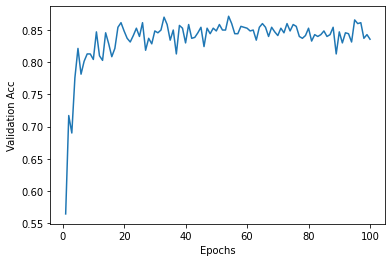

In [42]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Acc')
plt.show()

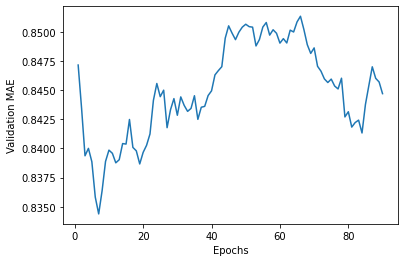

In [43]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_acc_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [47]:
model = build_model()
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.8300


In [48]:
test_acc_score

0.8299999833106995

In [49]:
test_loss_score

0.4653646945953369